## 2. Descriptive Analysis
For descriptive analysis, predominantly Pandas is used for data transformation, in conjunction with some useful visualization libraries, which help understanding of the obtained data.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns
import statsmodels.api as sm

def parse_time_value(time_string):
    # Parse the time string value and interpret it in seconds
    try:
        time_split = time_string.split(':')
        return int(time_split[0]) * 60.0 + float(time_split[1])
    except AttributeError:
        return time_string

# Set some specs for plotting
%matplotlib inline
mpl.rcParams['figure.figsize'] = (16.0, 8.0)
mpl.style.use('ggplot')
plt.rcParams['font.family'] = 'IPAGothic'

# Read data from the data folder
race_df = pd.read_csv('data/race.csv', low_memory=False, index_col=0)
horse_df = pd.read_csv('data/horse.csv', low_memory=False, index_col=0)
individual_df = pd.read_csv('data/individual.csv', low_memory=False, index_col=0)
trainer_df = pd.read_csv('data/trainer.csv', low_memory=False, index_col=0)
jockey_df = pd.read_csv('data/jockey.csv', low_memory=False, index_col=0)

## 2.1 Race

### 2.1.1 Race Dataframe 

In [2]:
# Do some type transformation for certain columns
race_df['run_time'] = race_df['run_time'].apply(lambda x: parse_time_value(x))
race_df['distance'] = race_df['distance'].apply(lambda x: re.search(r'(\d+)m', x).group(1)).astype(int)

# Overview of the dataframe structure
race_df.sample(n=5).T

,157399,305242,565162,69416,334298
run_date,2003-06-08,2006-07-30,2011-10-01,2001-06-16,2007-02-18
place,中京,新潟,阪神,阪神,東京
race,10R,9R,5R,3R,7R
title,桶狭間特別(1000万下),出雲崎特別(500万下),2歳新馬,3歳未勝利,4歳上500万下
type,芝,ダ,芝,ダ,芝
track,左,左,右,右,左
distance,1200,1200,1800,1200,1800
weather,晴,晴,晴,晴,晴
condition,良,良,良,稍重,不良
time,14:50,14:35,12:20,10:55,13:20


In [3]:
# Describe the numerical variables
race_df.describe()

,distance,bracket,horse_number,jockey_weight,run_time,run_time_last_600,win_odds,win_fav
count,856195.000000,856195.000000,856195.000000,856195.000000,856195.000000,856185.000000,856195.000000,856195.000000
mean,1628.721827,4.761170,7.854185,54.976779,101.318355,36.558317,65.695739,7.824011
std,432.664813,2.268103,4.441103,1.800192,30.072027,4.680072,94.010009,4.426163
min,1000.000000,1.000000,1.000000,47.000000,53.700000,12.700000,1.000000,1.000000
25%,1200.000000,3.000000,4.000000,54.000000,75.100000,35.600000,8.700000,4.000000
50%,1600.000000,5.000000,8.000000,55.000000,99.400000,37.000000,25.700000,8.000000
75%,1800.000000,7.000000,11.000000,56.000000,115.500000,38.600000,82.200000,11.000000
max,4260.000000,8.000000,18.000000,66.000000,326.400000,99.800000,999.900000,18.000000


### 2.1.2 Race Condition 

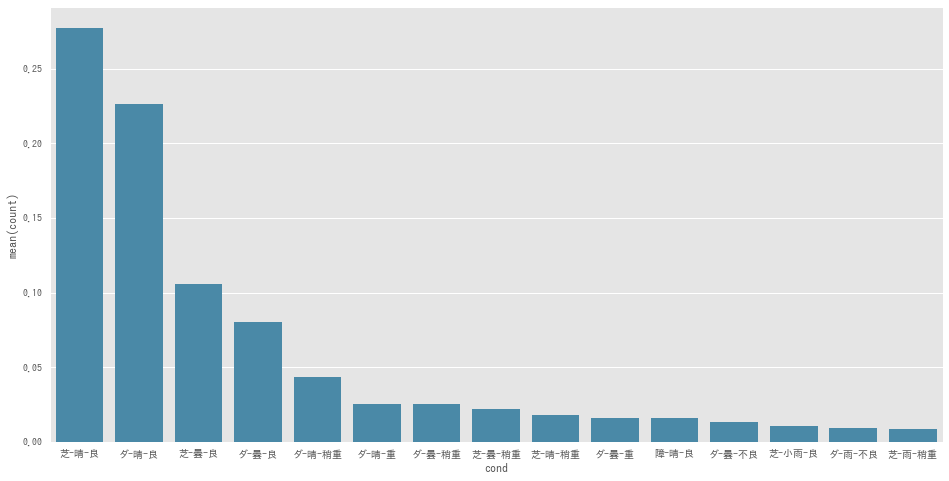

In [4]:
# Count the different race conditions
race_count = race_df.groupby(['type', 'weather', 'condition']).agg({'run_date': 'count'}).reset_index()
race_count.columns = ['type', 'weather', 'condition', 'count']
race_count['count'] = race_count['count'] / race_count['count'].sum()
race_count['cond'] = race_count['type'].str.cat(race_count['weather'], sep='-').str.cat(race_count['condition'], sep='-')
race_count_sorted = race_count.sort_values('count', ascending=False)[:15]
sns.barplot(y='count', x='cond', data=race_count_sorted, color='#3A8FB7')

### 2.1.3 Time and Distance

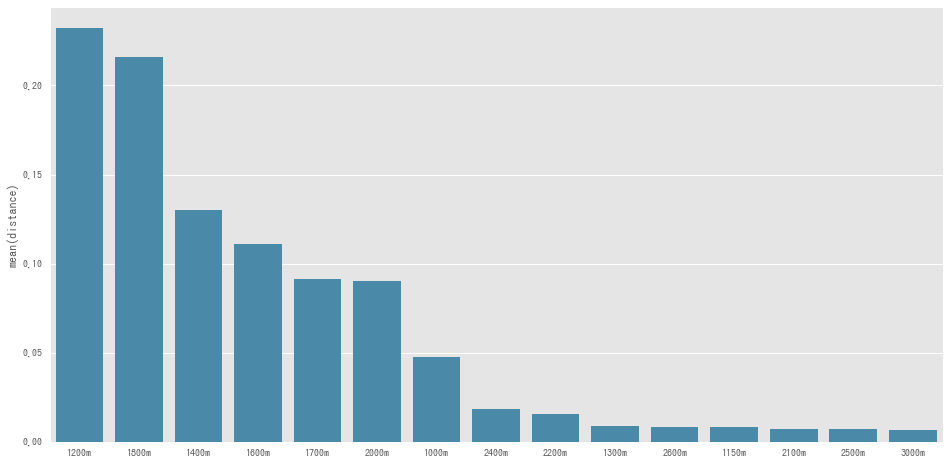

In [5]:
# Get the top run distance among the events
distance_count = race_df['distance'].value_counts()[:15]
distance_count.index = list(map(lambda x: '%sm' % str(x), distance_count.index))
sns.barplot(x=distance_count.index, y=distance_count/distance_count.sum(), color='#3A8FB7')

                            OLS Regression Results                            
Dep. Variable:               run_time   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 4.193e+08
Date:                Sat, 10 Feb 2018   Prob (F-statistic):               0.00
Time:                        20:04:14   Log-Likelihood:            -2.5528e+06
No. Observations:              856195   AIC:                         5.106e+06
Df Residuals:                  856194   BIC:                         5.106e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
distance       0.0627   3.06e-06   2.05e+04      0.0

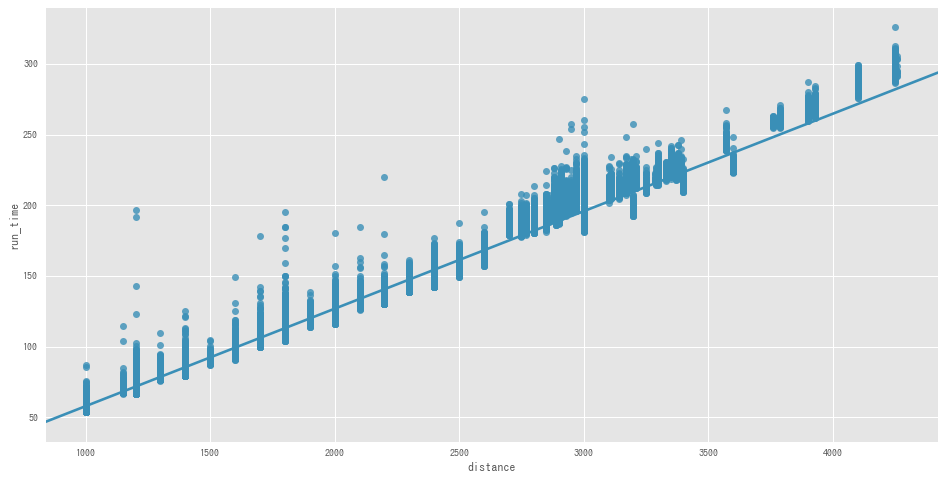

In [6]:
# Get the relationship between time and distance
dist_time = sm.OLS(race_df['run_time'], race_df['distance'])
dist_time_re = dist_time.fit()
print(dist_time_re.summary())
sns.regplot(y='run_time', x='distance', data=race_df, color='#3A8FB7')

## 2.2 Horse

### 2.2.1 Horse Dataframe 

In [7]:
# Do some type transformation for certain columns
horse_df['gender'] = horse_df['gender'].apply(lambda x: x[0])

# Overview of the dataframe structure
horse_df.sample(n=5).T

,7724,52691,2411,45512,26047
horse_name,エンプレスダーク,ラインアストロ,グレイズシチー,キャノンプレート,ホーリーランス
date_of_birth,1999年2月17日,2014年5月5日,1996年4月7日,2012年4月23日,2005年4月23日
trainer,藤沢和雄 (美浦),堀井雅広 (美浦),佐藤征助 (美浦),角居勝彦 (栗東),成島英春 (美浦)
owner,市川義美,東振牧場,三登,島川隆哉,山本精一
breeder,シンコーファーム,東振牧場,光伸牧場,ノーザンファーム,桑原牧場
place_of_birth,門別町,むかわ町,静内町,安平町,鵡川町
transaction_price,-,-,-,-,-
prize_obtained,2億277万円 (中央),0万円,"1,525万円 (中央)","1億5,109万円 (中央)",25万円 (地方)
race_record,33戦5勝 [ 5-11-3-14 ],1戦0勝 [ 0-0-0-1 ],18戦2勝 [ 2-0-1-15 ],23戦6勝 [ 6-2-3-12 ],14戦1勝 [ 1-1-1-11 ]
highlight_race,04'秩父特別(1000万下),NaN,99'3歳上500万下,17'中山牝馬S(G3),3歳B 6


In [8]:
# Describe the columns of the dataframe
horse_df.describe().T

,count,unique,top,freq
horse_name,56226,56226,ケイズイーグル,1
date_of_birth,56226,3628,2014年4月30日,52
trainer,56225,1739,(地方),345
owner,56223,5574,サンデーレーシング,826
breeder,56212,3399,ノーザンファーム,3195
place_of_birth,56224,98,浦河町,10510
transaction_price,56226,6130,-,43830
prize_obtained,56226,22408,0万円,8734
race_record,56226,16748,2戦0勝 [ 0-0-0-2 ],2109
highlight_race,37413,11527,C2,384


### 2.2.2 Gender and Breed 

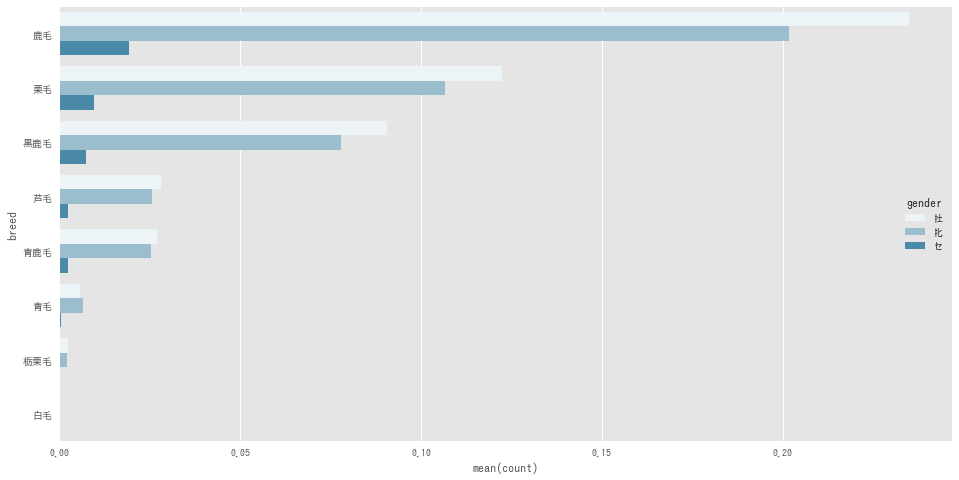

In [9]:
# Get gender and breed information
breed_gender_count = horse_df.groupby(['breed', 'gender']).agg({'horse_name': 'count'}).reset_index()
breed_gender_count.columns = ['breed', 'gender', 'count']
breed_gender_count = breed_gender_count.sort_values('count', ascending=False)
breed_gender_count['count'] = breed_gender_count['count'] / breed_gender_count['count'].sum()
sns.barplot(x='count', y='breed', data=breed_gender_count, color='#3A8FB7', hue='gender')

### 2.2.3 Horse and Run Time

In [10]:
# Merge race and horse dataframe and alter datetime type of information
horse_race = race_df.merge(horse_df, left_on='horse', right_on='horse_name')
horse_race['run_date'] = horse_race['run_date'].str.cat(horse_race['time'], sep=' ').apply(lambda x: pd.Timestamp(x))
horse_race['date_of_birth'] = horse_race['date_of_birth'].apply(lambda x: pd.Timestamp('-'.join(re.findall(r'\d+', x))))
horse_race['curr_age'] = horse_race['run_date'].subtract(horse_race['date_of_birth']).dt.days / 365.0

# Replace abnormal age value by the original sex/age string
ori_age = horse_race['sex_age'].apply(lambda string: float(string[1]))
age_diff = horse_race['curr_age'] - ori_age
horse_race.loc[abs(age_diff) > 1, 'curr_age'] = ori_age
horse_race.sample(n=5).T

,355314,523934,388245,376317,220984
run_date,2011-06-26 16:10:00,2015-04-12 10:55:00,2012-04-14 14:05:00,2010-02-06 10:10:00,2007-08-11 15:25:00
place,中山,中山,福島,東京,札幌
race,12R,3R,9R,1R,9R
title,3歳上500万下,3歳未勝利,4歳上500万下,3歳未勝利,札幌日刊スポーツ杯(1600万下)
type,ダ,ダ,ダ,ダ,芝
track,右,右,右,左,右
distance,1200,1800,1700,1300,1200
weather,曇,晴,雨,晴,晴
condition,良,重,稍重,稍重,良
time,16:10,10:55,14:05,10:10,15:25


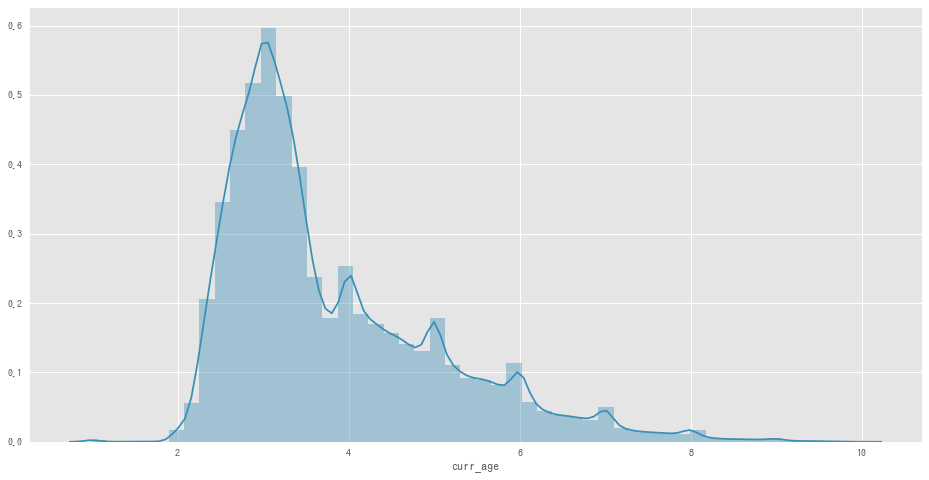

In [11]:
# Get the histogram of horse age relative to the run date and time
sns.distplot(horse_race['curr_age'], color='#3A8FB7')

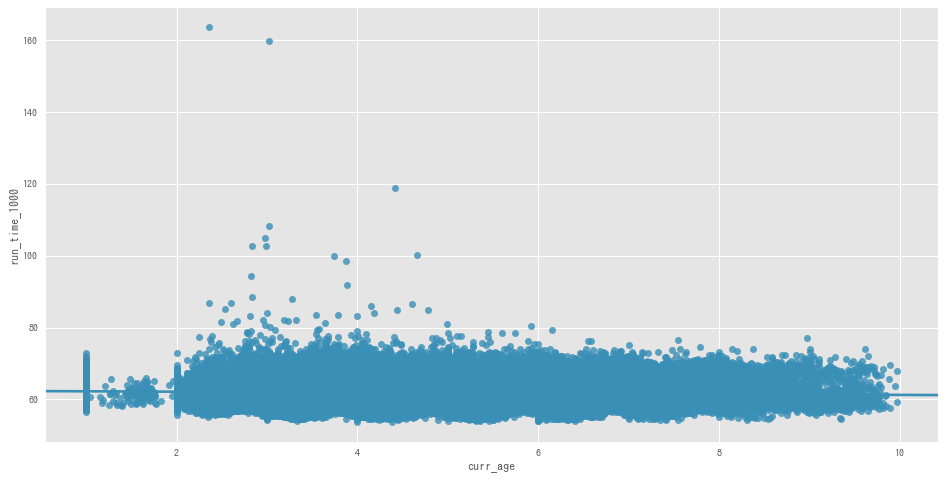

In [12]:
horse_race['run_time_1000'] = horse_race['run_time'] / (horse_race['distance'] / 1000)
sns.regplot(x='curr_age', y='run_time_1000', data=horse_race, color='#3A8FB7')

## 2.3 Individuals

In [13]:
# Do some type transformation for certain columns
for columns in list(individual_df.columns)[2:-1]:
    individual_df[columns] = individual_df[columns].apply(lambda x: x.replace(',', '') 
                                                          if type(x) not in [int, float] else x).astype(float)

# Overview of the dataframe structure
individual_df.sample(n=5).T

,51679,56831,55188,10096,20178
individual_type,生産者,生産者,馬主,調教師,馬主
name,Luis de Hechavarria,長谷地義正,橘八重子,[西]吉永忍,高山徳義
year,2001,2006,2006,2016,2005
rank,1309,1298,506,184,914
first,0,0,2,5,0
second,0,0,1,6,0
third,1,0,2,11,1
out,4,12,7,213,9
races_major,0,0,0,5,0
wins_major,0,0,0,0,0


In [14]:
# Describe the columns of the dataframe
individual_df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,71040.0,2002.606391,8.774716,1986.0,1996.0,2003.000,2010.000,2018.0
rank,71040.0,643.945636,450.548975,1.0,214.0,600.000,1039.000,1547.0
first,71000.0,3.937676,12.019248,0.0,0.0,1.000,3.000,592.0
second,71000.0,3.907408,10.976640,0.0,0.0,1.000,3.000,517.0
third,71000.0,3.895394,10.297910,0.0,0.0,1.000,3.000,437.0
out,71000.0,39.448183,88.211216,0.0,4.0,11.000,34.000,3390.0
races_major,71000.0,2.075169,7.950301,0.0,0.0,0.000,1.000,476.0
wins_major,71000.0,0.149000,0.855631,0.0,0.0,0.000,0.000,51.0
races_special,71000.0,11.615169,31.625763,0.0,0.0,3.000,10.000,1423.0
wins_special,71000.0,0.916310,3.281831,0.0,0.0,0.000,1.000,170.0


## 2.4 Jockey and Trainer Profile 

In [15]:
# Do some type transformation for certain columns
for columns in trainer_df.columns:
    trainer_df[columns] = trainer_df[columns].apply(lambda x: np.nan if x == 'null' else x)

for columns in jockey_df.columns:
    jockey_df[columns] = jockey_df[columns].apply(lambda x: np.nan if x == 'null' else x)
    if columns in ['height', 'weight']:
        jockey_df[columns] = jockey_df[columns].apply(lambda x: x if pd.isnull(x) else re.search(r'\d+', x).group(0))
        jockey_df[columns] = jockey_df[columns].astype(float)

# Overview of the dataframe structure
trainer_df.sample(n=5).T

,272,215,128,295,258
trainer_name,[地]松本隆宏,[東]山崎彰義,[東]稲葉隆一,[外]マスグロ,[地]矢ケ部徹
date_of_birth,1957/04/16,1931/11/01,1951/02/25,1956/03/29,1962/09/27
place_of_birth,地方,地方,地方,地方,地方
first_run_date,NaN,NaN,NaN,NaN,NaN
first_run_horse,NaN,NaN,NaN,NaN,NaN
first_win_date,NaN,NaN,NaN,NaN,NaN
first_win_horse,NaN,NaN,NaN,NaN,NaN


In [16]:
# Overview of the dataframe structure
jockey_df.sample(n=5).T

,89,99,162,103,56
jockey_name,藤原英幸,横山義行,テュリエ,河北通,飯田祐史
date_of_birth,1971/07/11,1962/07/28,1974/01/04,1977/02/27,1970/11/18
place_of_birth,地方,地方,ドイツ,地方,鳥取県
blood_type,NaN,NaN,NaN,NaN,A型
height,NaN,NaN,170,NaN,164
weight,NaN,NaN,53,NaN,51
first_flat_run_date,1990/03/03,1984/03/03,1997/11/23,1997/03/01,1989/03/04
first_flat_run_horse,トウカイメモリー,ダービーコーラス,オンワードアイガー,ワンダーレベルワン,ミツワシンゲキ
first_flat_win_date,1990/03/24,1984/11/10,2013/03/23,1997/06/07,1989/03/18
first_flat_win_horse,トウカイシャーク,ミトモスイセイ,ベッラヴォーチェ,アワーデッドラブ,ヤマニントリガー


In [17]:
# Describe the columns of the dataframe
trainer_df.describe().T

,count,unique,top,freq
trainer_name,368,368,[西]牧浦充徳,1
date_of_birth,368,362,1930/06/05,2
place_of_birth,368,29,地方,239
first_run_date,129,98,1999/03/06,5
first_run_horse,128,128,ダイナガーデン,1
first_win_date,128,122,1999/04/04,3
first_win_horse,128,128,ステートリーシチー,1


In [18]:
# Describe the columns of the dataframe
jockey_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
jockey_name,269,269,丸山元気,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_of_birth,269,266,1974/03/19,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
place_of_birth,269,30,地方,158,NaN,NaN,NaN,NaN,NaN,NaN,NaN
blood_type,109,4,A型,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
height,111,NaN,NaN,NaN,162.099,4.35463,149,160,162,165,174
weight,111,NaN,NaN,NaN,48.9189,3.23092,45,46,48,51.5,59
first_flat_run_date,250,163,1997/03/01,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_flat_run_horse,250,250,トーアチョモランマ,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_flat_win_date,190,180,2007/03/03,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first_flat_win_horse,190,189,ホッカイカオリ,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
